In [66]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns


In [67]:
#linear regression

df=pd.read_csv("cells-Copy1.csv")
df.head()


,time,cells
0,0.1,209
1,0.2,212
2,0.3,218
3,0.4,221
4,0.5,225


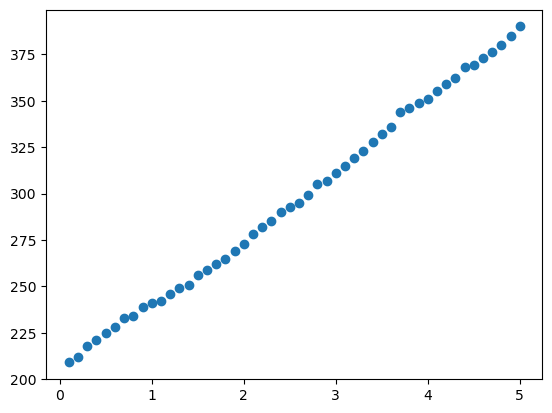

In [68]:
plt.scatter("time","cells",data=df)

In [69]:
x_df= df[["time"]]
print(x_df.dtypes)

time    float64
dtype: object


In [70]:
y_df=df[["cells"]]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.2, random_state=42)

In [72]:
from sklearn import linear_model
model=linear_model.LinearRegression()

In [73]:
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.9980738715626029


In [74]:
pred_test=model.predict(x_test)
print(y_test,pred_test)

    cells
13    251
39    351
30    315
45    373
17    265
48    385
26    299
25    295
32    323
19    273 [[254.91574677]
 [350.46227562]
 [317.38847717]
 [372.51147459]
 [269.61521275]
 [383.53607407]
 [302.6890112 ]
 [299.0141447 ]
 [324.73821016]
 [276.96494574]]


In [75]:
print("MSE=",np.mean(pred_test-y_test)**2)

MSE= 4.767922382017478


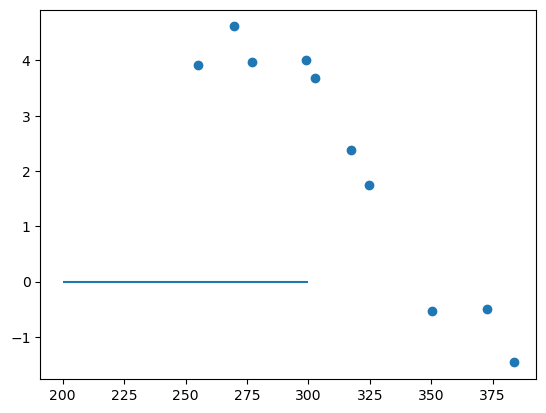

In [76]:
#residual plot

plt.scatter(pred_test,pred_test-y_test)
plt.hlines(y=0, xmin=200, xmax=300)


In [77]:
#multiple liner

df=pd.read_csv("heart_data-Copy1.csv")
df.head()

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224


In [78]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


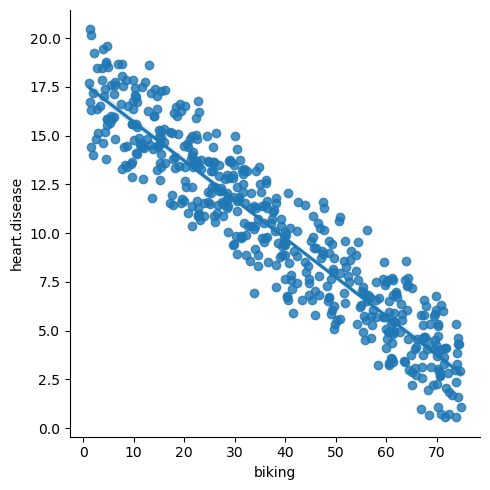

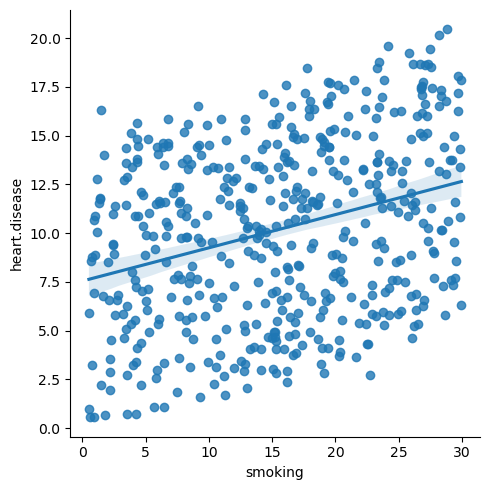

In [79]:
sns.lmplot(x="biking",y="heart.disease",data=df)
sns.lmplot(x="smoking",y="heart.disease",data=df)


In [80]:
x= df[["biking","smoking"]]
y=df[["heart.disease"]]

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [82]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.9811067878031208

In [83]:
pred=model.predict(x_test)
print(y_test,pred)

     heart.disease
487       6.756015
73        9.466026
231      14.088654
175      13.377430
237      16.384678
..             ...
193      14.547755
5         9.550046
116      14.411483
45       12.328899
16        5.443342

[150 rows x 1 columns] [[ 5.61417231]
 [ 9.23854928]
 [15.77064591]
 [13.96271678]
 [16.97258754]
 [13.38551065]
 [ 7.02565417]
 [ 9.49069576]
 [ 6.83117942]
 [12.07219675]
 [ 8.04307687]
 [10.14595377]
 [ 5.91159788]
 [10.14538696]
 [ 7.3415733 ]
 [17.65460707]
 [ 4.15655062]
 [ 6.87547269]
 [ 5.24683245]
 [ 6.77480127]
 [ 2.08250582]
 [ 7.39533445]
 [12.03453847]
 [13.99326278]
 [12.09739539]
 [13.60433903]
 [ 6.19490735]
 [ 9.56118094]
 [13.94750676]
 [11.82223539]
 [ 8.52602497]
 [11.48105164]
 [12.41957266]
 [17.7284097 ]
 [ 3.53706181]
 [ 6.09047121]
 [ 8.17208463]
 [ 7.50053942]
 [12.56170624]
 [10.47015413]
 [ 4.88309485]
 [ 4.00779535]
 [ 7.798394  ]
 [10.9073288 ]
 [10.77541879]
 [ 8.85290916]
 [17.03995211]
 [ 7.50903037]
 [18.06939528]
 [ 4.58997823

In [49]:
print("MSE= ",np.mean(pred-y_test)**2)

MSE=  0.00029034215597532523


In [84]:
model.predict([[2,3]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15.141897]])

[[-0.20006703  0.17674695]] [15.01179021]


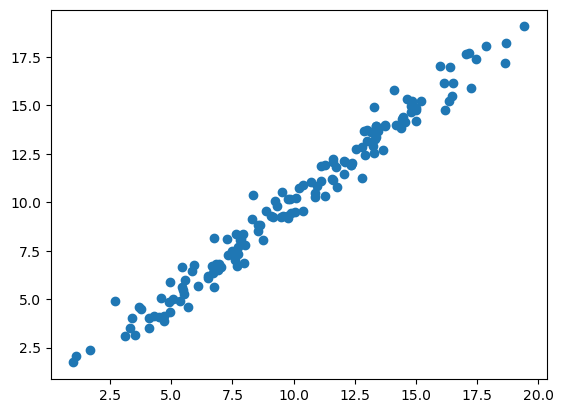

In [85]:
print(model.coef_,model.intercept_)
plt.scatter(y_test,pred)

In [87]:
# logistic regression

df=pd.read_csv("wisconsin_breast_cancer_dataset-Copy1.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [89]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [92]:
print(df.isnull().sum)

<bound method DataFrame.sum of         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

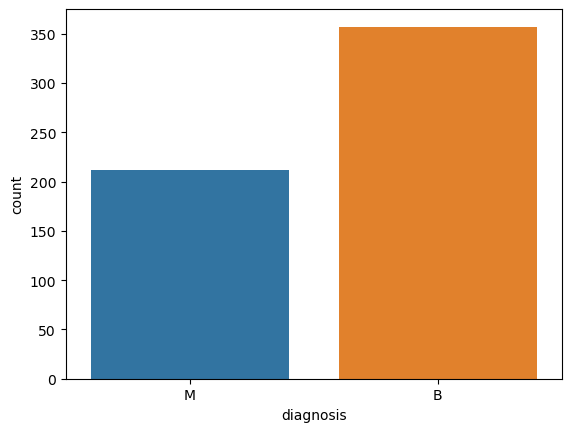

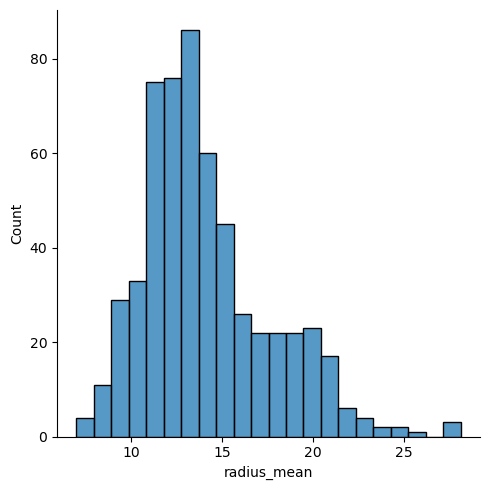

In [97]:
#countplot
sns.countplot(x="diagnosis", data=df) 
sns.displot(df['radius_mean'], kde=False)
numeric_df = df.select_dtypes(include=[float, int])
print(df.dtypes)
print(numeric_df.corr())

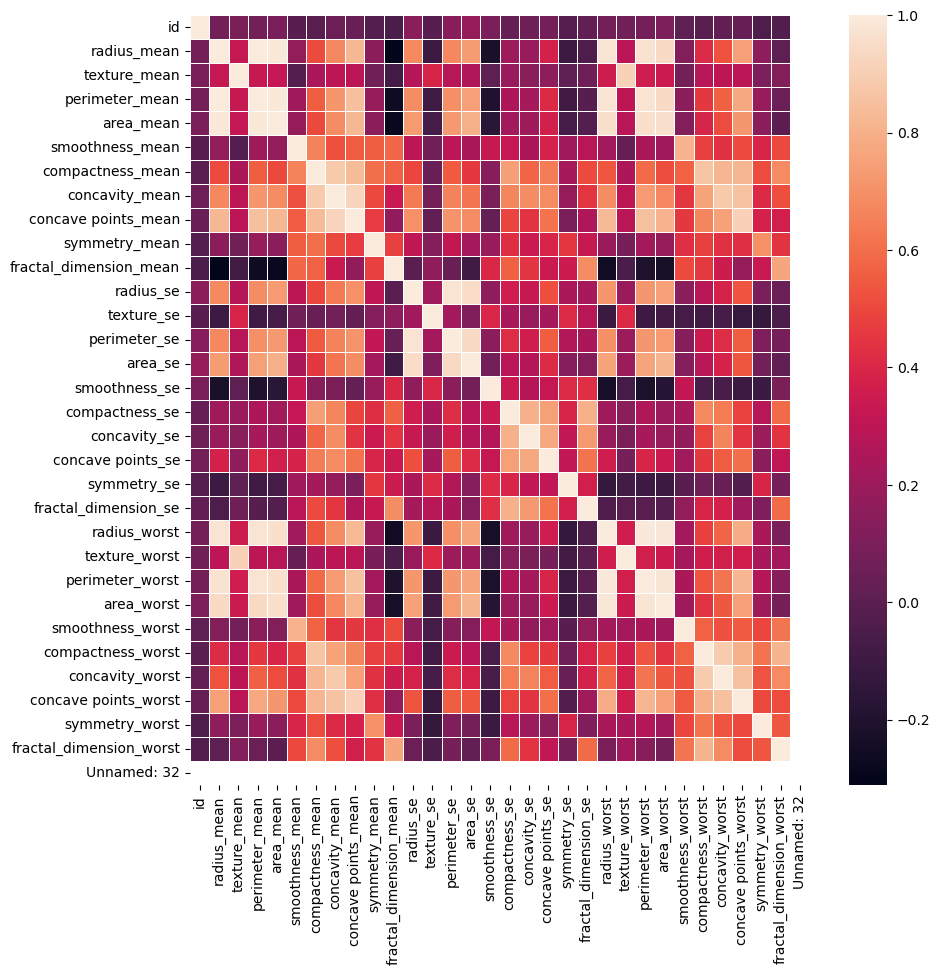

In [100]:
#heatmap
corrMatrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=False, linewidths=.5, ax=ax)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


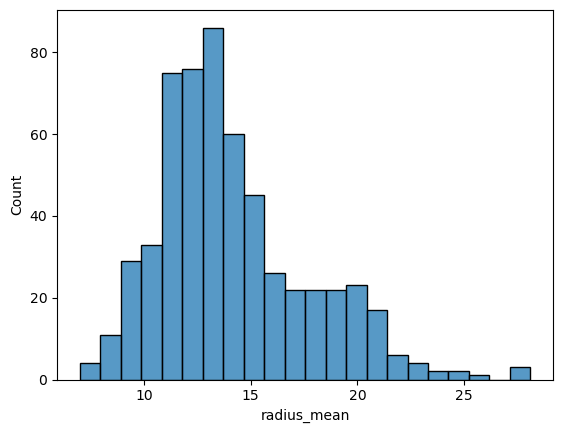

In [102]:
#ditribution plot
sns.histplot(df['radius_mean'], kde=False)
plt.show()

In [103]:
# pre processing

Y=df['diagnosis'].values
X=df.drop(labels=['diagnosis'],axis=1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X_imputed=imputer.fit_transform(X)
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_imputed)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [104]:
# evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)


Accuracy 0.9824561403508771


In [105]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[71  0]
 [ 2 41]]
